# Serial founder events with migration, founder events.

In these simulations, the urban environment was colonized through serial founder events beginning from a single rural population at carrying capcity. We performed simulations under 3 migration rates: 0, 0.01, 0.05. We used 10 fouding proportions: 0.01; 0.02; 0.035; 0.05; 0.075; 0.1; 0.2; 0.5; 0.75; 1.0. The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 30): 

* Number of simulations: 1000
* Number of generations: 500 (following filling of matrix)
* Max Creation probability: 1.0
* Bottleneck proportion: [0.01; 0.02; 0.035; 0.05; 0.075; 0.1; 0.2; 0.5; 0.75; 1.0]
* pA and pB: 0.5
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): 1000

In [1]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)
library(broom)

Loading required package: lattice
------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
#Working directory for datasets varying migration rate and bottleneck proportion
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Data/summary-datasets/oneFill_Bottlenecks')

#Load datasets that will be used for analyses
datSlopes <- fread('20171106_SlopeSum_Gen_BotMig-Merged_distRev.csv', header = T)
datFreqFirst <- fread('20171106_FreqFirstGen_BotMig-Merged_distRev.csv', header = T)
datSlopes$bot <- as.factor(as.character(datSlopes$bot))
datSlopes$Mig_rate <- as.factor(as.character(datSlopes$Mig_rate))
datFreqFirst$bot <- as.factor(as.character(datFreqFirst$bot))
datFreqFirst$Mig_rate <- as.factor(as.character(datFreqFirst$Mig_rate))

#Data subsets
datSlopes_GenOne <- subset(datSlopes, seq == "1")
datSlopes_NoMig <- subset(datSlopes, Mig_rate == "0")
datSlopes_GenOne_NoMig <- subset(datSlopes, seq == "1" & Mig_rate == "0")
datFreqFirst_StrongBot_NoMig <- subset(datFreqFirst, bot == "0.01" & Mig_rate == "0")
datFreqFirst_InterBot_NoMig <- subset(datFreqFirst, bot == "0.2" & Mig_rate == "0")
datFreqFirst_NoBot_NoMig <- subset(datFreqFirst, bot == "1" & Mig_rate == "0")


#Proportion of simulations with Cyan lost by distance under strong bottlenecks
datPropLost_StrongBot_NoMig <- datFreqFirst_StrongBot_NoMig %>%
    group_by(Distance) %>% 
    summarize(n = n(),
             Lost = sum(Cyan == 0) / n,
             Fixed = sum(Cyan == 1) / n) %>%
    mutate(Founder = "Strong")
datPropLost_StrongBot_NoMig <- dplyr::select(datPropLost_StrongBot_NoMig, Distance, 
                                          Lost, Founder)


#Proportion of simulations with Cyan lost by distance under intermediate bottlenecks
datPropLost_InterBot_NoMig <- datFreqFirst_InterBot_NoMig %>%
    group_by(Distance) %>%
    summarize(n = n(),
             Lost = sum(Cyan == 0) / n,
             Fixed = sum(Cyan == 1) / n) %>%
    mutate(Founder = "Intermediate")
datPropLost_InterBot_NoMig <- dplyr::select(datPropLost_InterBot_NoMig, Distance, 
                                          Lost, Founder)

#Proportion of simulations with Cyan lost by distance under no bottlenecks
datPropLost_NoBot_NoMig <- datFreqFirst_NoBot_NoMig %>%
    group_by(Distance) %>%
    summarize(n = n(),
             Lost = sum(Cyan == 0) / n,
             Fixed = sum(Cyan == 1) / n) %>%
    mutate(Founder = "None")
datPropLost_NoBot_NoMig <- dplyr::select(datPropLost_NoBot_NoMig, Distance, 
                                          Lost, Founder)

# Merge datasets from strong and intermediate bottlenecks above
datPropLost_merged <- rbind(datPropLost_StrongBot_NoMig, datPropLost_InterBot_NoMig, datPropLost_NoBot_NoMig)

# Calculate mean frequency in first generation across simulations for each distance
MeanFreqFirstGen_Distance <- datFreqFirst %>%
    group_by(Distance, bot, Mig_rate) %>%
    summarize(Freq = mean(Cyan))

MeanFreqFirstGen_Distance_StrongBot_NoMig <- subset(MeanFreqFirstGen_Distance, bot == "0.01" & Mig_rate == "0")
MeanFreqFirstGen_Distance_InterBot_NoMig <- subset(MeanFreqFirstGen_Distance, bot == "0.2" & Mig_rate == "0")
MeanFreqFirstGen_Distance_NoBot_NoMig <- subset(MeanFreqFirstGen_Distance, bot == "1" & Mig_rate == "0")



In [30]:
# RegSummary <- fread('20171106_FitSimCoef_BotMig-Merged_distRev.csv')

# Mean of significant slopes
MeansProps_NoMig_GenOne_SigOnly <- RegSummary %>%
    group_by(Sim, Mig_rate, bot) %>%
    mutate(seq = 1:n()) %>%
    filter(seq == 1 & p.value < 0.05) %>%
    group_by(Mig_rate, bot) %>%
    summarize(mean_SigSlope = mean(estimate), 
              sd_SigSlope = sd(estimate),
              n = length(estimate),
              se_SigSlope = sd_SigSlope / sqrt(n), 
              ci_SigSlope = 1.96 * se_SigSlope)

In [31]:
MeansProps_NoMig_GenOne_SigOnly

Mig_rate,bot,mean_SigSlope,sd_SigSlope,n,se_SigSlope,ci_SigSlope
0.00,0.010,0.0017420104,0.004668886,597,0.0001910848,0.0003745262
0.00,0.025,0.0022714659,0.005933540,836,0.0002052158,0.0004022229
0.00,0.035,0.0026822177,0.006634352,895,0.0002217619,0.0004346534
0.00,0.050,0.0032832956,0.007983042,958,0.0002579204,0.0005055239
0.00,0.075,0.0038778541,0.009574509,986,0.0003049145,0.0005976324
0.00,0.100,0.0049129897,0.010419545,993,0.0003306543,0.0006480823
0.00,0.200,0.0063164429,0.012727540,921,0.0004193867,0.0008219979
0.00,0.500,0.0032524284,0.010230194,743,0.0003753094,0.0007356065
0.00,0.750,0.0012616775,0.007466055,663,0.0002899576,0.0005683168
0.00,1.000,0.0007180752,0.005199307,590,0.0002140521,0.0004195421


In [4]:
str(datFreqFirst)

Classes ‘data.table’ and 'data.frame':	1200000 obs. of  12 variables:
 $ x         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bot       : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 ...
 $ Sim       : int  0 0 0 1 1 1 2 2 2 3 ...
 $ Generation: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Cyan      : num  0.563 0.563 0.563 0.563 0.563 0.563 0.563 0.563 0.563 0.563 ...
 $ Mat_full  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pop_size  : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Mig_rate  : num  0 0.01 0.05 0 0.01 0.05 0 0.01 0.05 0 ...
 $ pA        : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ pB        : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ Distance  : int  40 40 40 40 40 40 40 40 40 40 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=13),
          axis.text.y=element_text(size=13),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=13,angle=45,hjust=1),
          axis.text.y=element_text(size=13),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

## Mean slope with founder proportion under varying migration rates

Here I look at the mean slope across simulations under varying founding proportions and migration rates. Mean slope is calculated in the first generation following the filling of the landscape matrix. I also plot the change in the mean slope with increasing generations. 

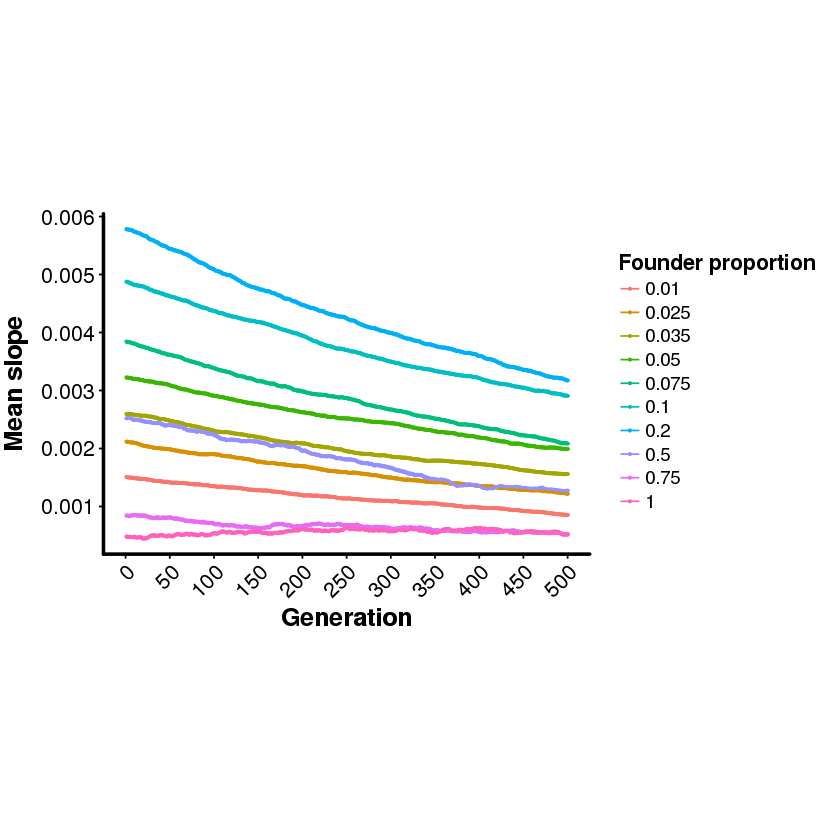

In [18]:
MeanSlope_Cyan_byGen <- ggplot(datSlopes_NoMig, aes(x = seq, y = mean, group = bot, color = bot)) + 
    ylab("Mean slope") + xlab("Generation") + geom_point(size = 0.5, aes(color = bot)) +
    geom_line(size = 0.5, aes(color = bot)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Founder proportion") + ng1.45
MeanSlope_Cyan_byGen 

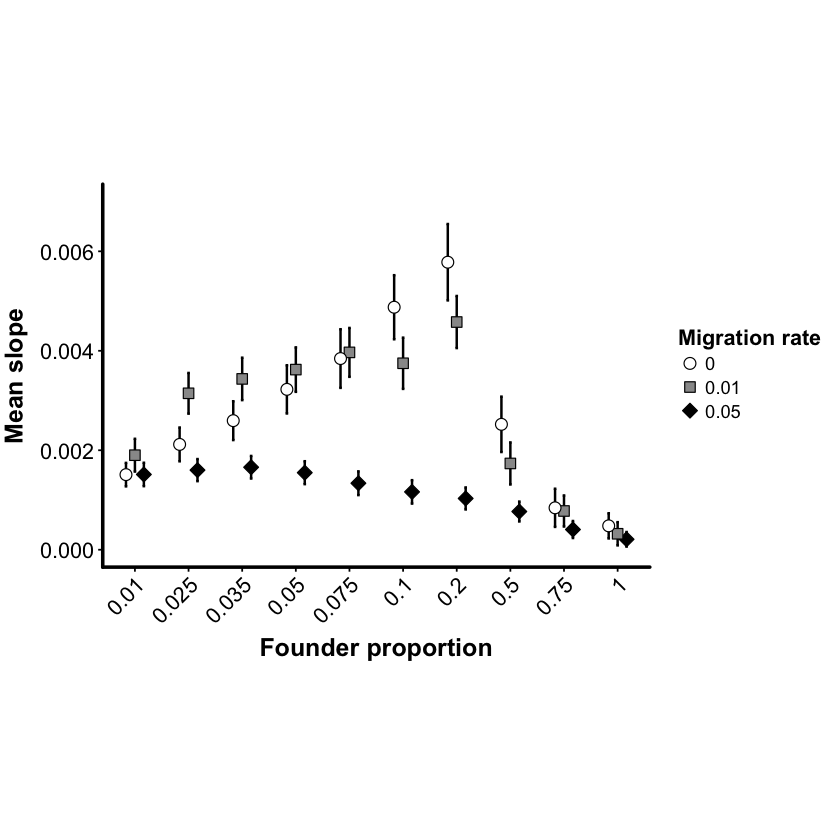

In [5]:
MeanSlope_BotMig <- ggplot(datSlopes_GenOne, aes(x = bot, y = mean, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.5)) + 
#     geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    coord_cartesian(ylim = c(0, 0.007)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Founder proportion") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_BotMig

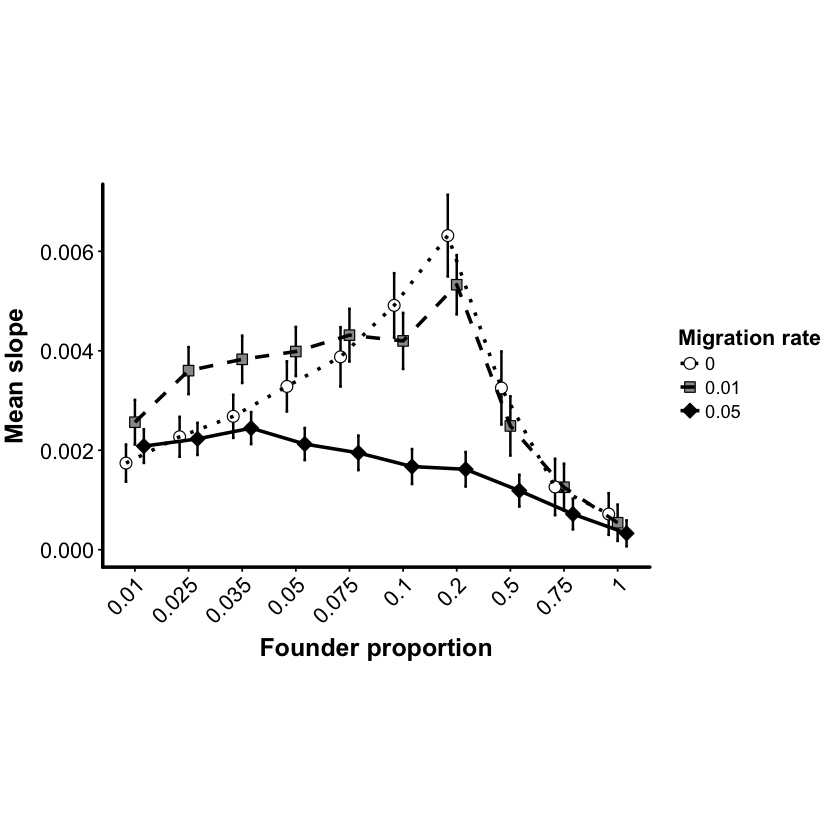

In [37]:
MeanSlope_BotMig_SigOnly <- ggplot(MeansProps_NoMig_GenOne_SigOnly, aes(x = factor(bot), y = mean_SigSlope, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean_SigSlope - ci_SigSlope, ymax = mean_SigSlope + ci_SigSlope), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    coord_cartesian(ylim = c(0, 0.007)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Founder proportion") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_BotMig_SigOnly

## Effects of founder events and migration on proportion of negative and positive clines

Here I look at how founder effects and migration affect the proportion of significantly negative and positive clines in the _Ac_ and _Li_ alleles and in HCN clines. 

**Positive clines**: Less HCN in urban environment (i.e. loss of HCN across space)  
**Negative clines**: More HCN in urban environment (i.e. gain in HCN across space)

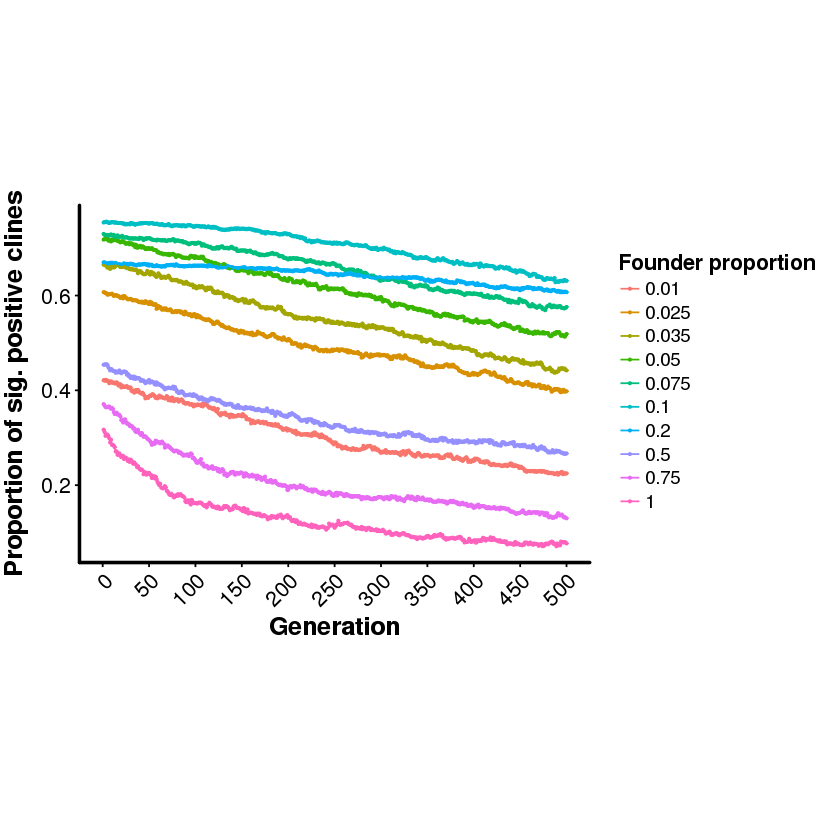

In [21]:
PropSigPos_Cyan_byGen <- ggplot(datSlopes_NoMig, aes(x = seq, y = prop_sigPos, group = bot, color = bot)) + 
    ylab("Proportion of sig. positive clines") + xlab("Generation") + geom_point(size = 0.5, aes(color = bot)) +
    geom_line(size = 0.5, aes(color = bot)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Founder proportion") + ng1.45
PropSigPos_Cyan_byGen 

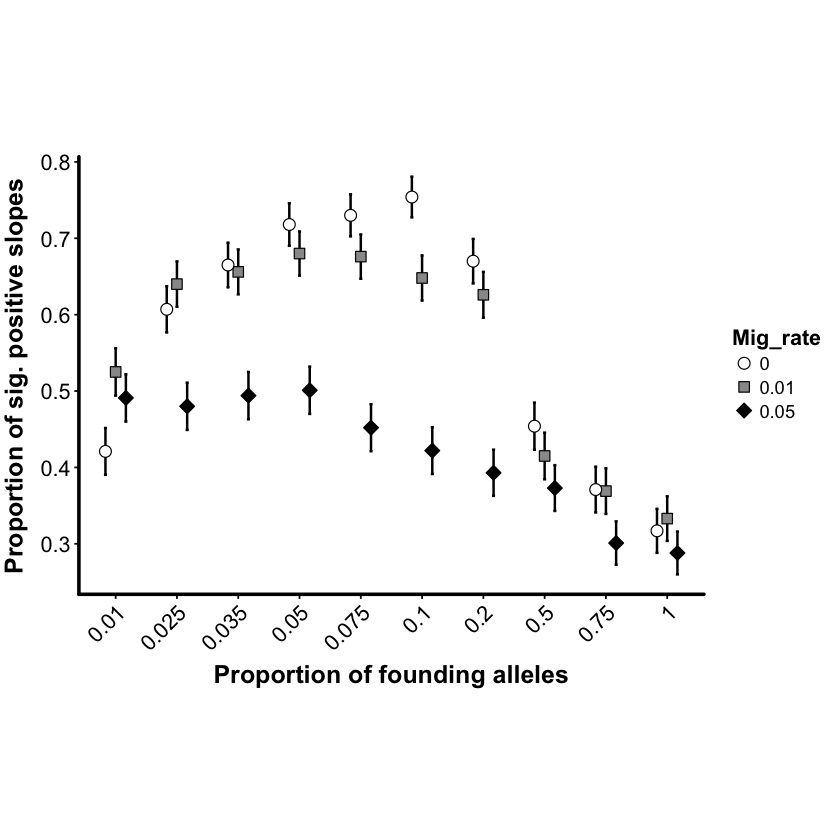

In [6]:
PropSigPos_BotMig <- ggplot(datSlopes_GenOne, aes(x = bot, y = prop_sigPos, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.5)) + 
#     geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of sig. positive slopes") + xlab("Proportion of founding alleles") + ng1.45
PropSigPos_BotMig

## Dynamics of HCN frequency change during colonization

Here I try to understand the hump-shaped distribution above by exploring how the frequency of HCN changes during the colonization process. 

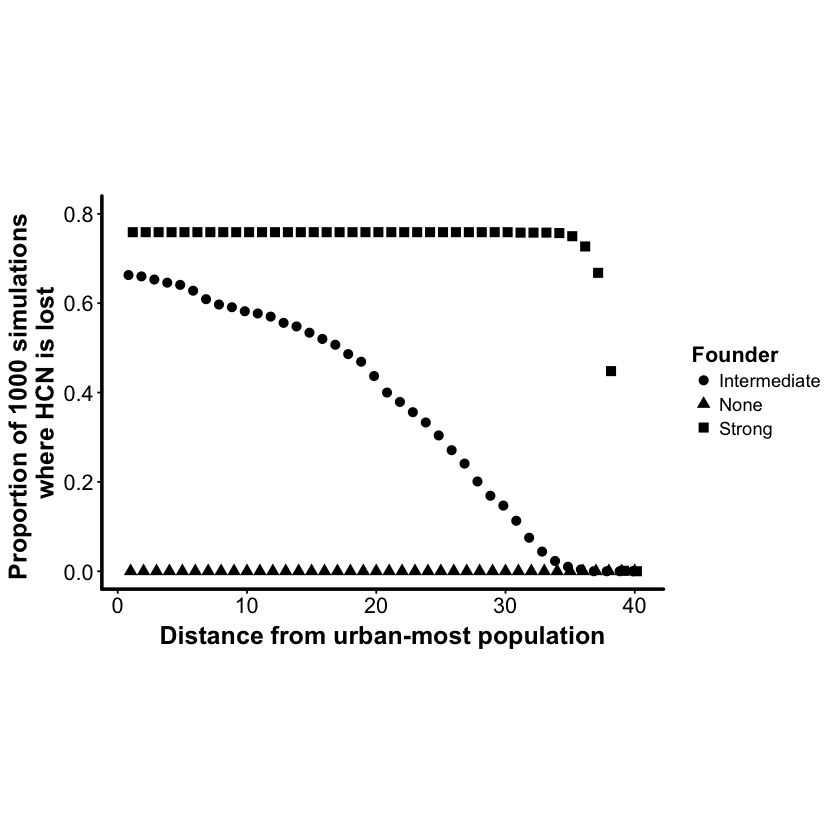

In [29]:
propLost_bot_NoMig <- ggplot(datPropLost_merged, aes(x = Distance, y = Lost, group = Founder)) + 
    geom_point(size = 2.5, aes(fill = Founder, shape = Founder), position = position_dodge(width = 0.5)) +
#     geom_line(size = 0.75, aes(linetype = Founder)) +
    ylab("Proportion of 1000 simulations 
where HCN is lost") + xlab("Distance from urban-most population") +
    coord_cartesian(ylim = c(0, 0.8)) + scale_y_continuous(breaks = seq(from = 0, to = 0.8, by = 0.2))  + ng1
propLost_bot_NoMig

In [72]:
lm_FreqFirstGen_StrongBot_NoMig <- lm(Freq ~ Distance, data = MeanFreqFirstGen_Distance_StrongBot_NoMig)
summary(lm_FreqFirstGen_StrongBot_NoMig)


Call:
lm(formula = Freq ~ Distance, data = MeanFreqFirstGen_Distance_StrongBot_NoMig)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05468 -0.03498 -0.01131  0.01506  0.24982 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.2049757  0.0196579  10.427 1.05e-12 ***
Distance    0.0027050  0.0008356   3.237   0.0025 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.061 on 38 degrees of freedom
Multiple R-squared:  0.2162,	Adjusted R-squared:  0.1956 
F-statistic: 10.48 on 1 and 38 DF,  p-value: 0.002504


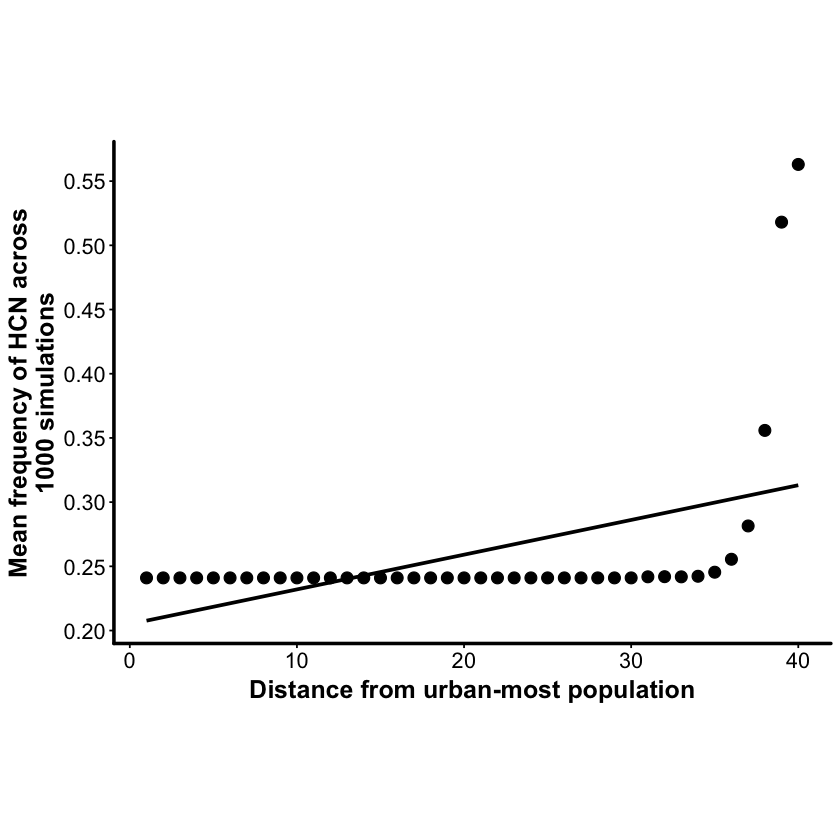

In [10]:
FreqFirstGen_StrongBot_NoMig <- ggplot(MeanFreqFirstGen_Distance_StrongBot_NoMig, aes(x = Distance, y = Freq)) + 
    geom_point(size = 3) +
    geom_smooth(method = "lm", se = F, colour = "black", size = 1.05) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    scale_y_continuous(breaks = seq(from = 0, to = 0.55, by = 0.05)) + ng1
FreqFirstGen_StrongBot_NoMig

In [76]:
lm_FreqFirstGen_InterBot_NoMig <- lm(Freq ~ Distance, data = MeanFreqFirstGen_Distance_InterBot_NoMig)
summary(lm_FreqFirstGen_InterBot_NoMig)


Call:
lm(formula = Freq ~ Distance, data = MeanFreqFirstGen_Distance_InterBot_NoMig)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028870 -0.021871 -0.007804  0.019546  0.041450 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.2362970  0.0074957   31.52   <2e-16 ***
Distance    0.0073500  0.0003186   23.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02326 on 38 degrees of freedom
Multiple R-squared:  0.9334,	Adjusted R-squared:  0.9316 
F-statistic: 532.2 on 1 and 38 DF,  p-value: < 2.2e-16


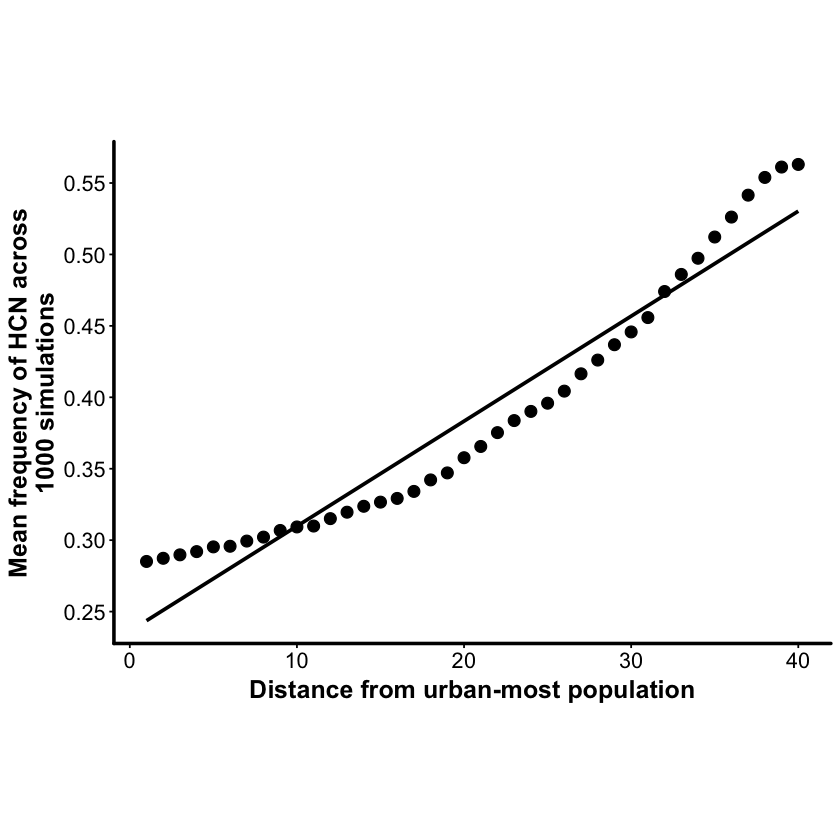

In [12]:
FreqFirstGen_InterBot_NoMig <- ggplot(MeanFreqFirstGen_Distance_InterBot_NoMig, aes(x = Distance, y = Freq)) + 
    geom_point(size = 3) +
    geom_smooth(method = "lm", se = F, colour = "black", size = 1.05) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    scale_y_continuous(breaks = seq(from = 0, to = 0.55, by = 0.05)) + ng1
FreqFirstGen_InterBot_NoMig

In [78]:
lm_FreqFirstGen_NoBot_NoMig <- lm(Freq ~ Distance, data = MeanFreqFirstGen_Distance_NoBot_NoMig)
summary(lm_FreqFirstGen_NoBot_NoMig)


Call:
lm(formula = Freq ~ Distance, data = MeanFreqFirstGen_Distance_NoBot_NoMig)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.333e-03 -1.134e-03 -6.130e-06  9.098e-04  2.859e-03 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5254653  0.0004212 1247.42   <2e-16 ***
Distance    0.0009125  0.0000179   50.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001307 on 38 degrees of freedom
Multiple R-squared:  0.9856,	Adjusted R-squared:  0.9852 
F-statistic:  2597 on 1 and 38 DF,  p-value: < 2.2e-16


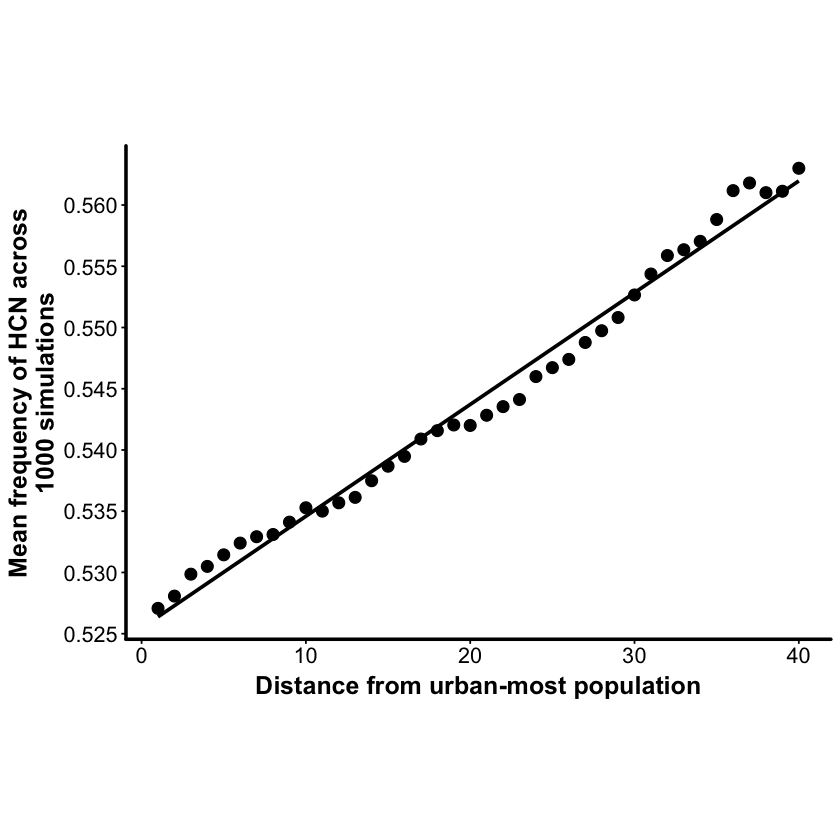

In [16]:
FreqFirstGen_NoBot_NoMig <- ggplot(MeanFreqFirstGen_Distance_NoBot_NoMig, aes(x = Distance, y = Freq)) + 
    geom_point(size = 3) +
    geom_smooth(method = "lm", se = F, colour = "black", size = 1.05) +
    ylab("Mean frequency of HCN across
1000 simulations") + xlab("Distance from urban-most population") + 
    scale_y_continuous(breaks = seq(from = 0.525, to = 0.565, by = 0.005)) + ng1
FreqFirstGen_NoBot_NoMig 

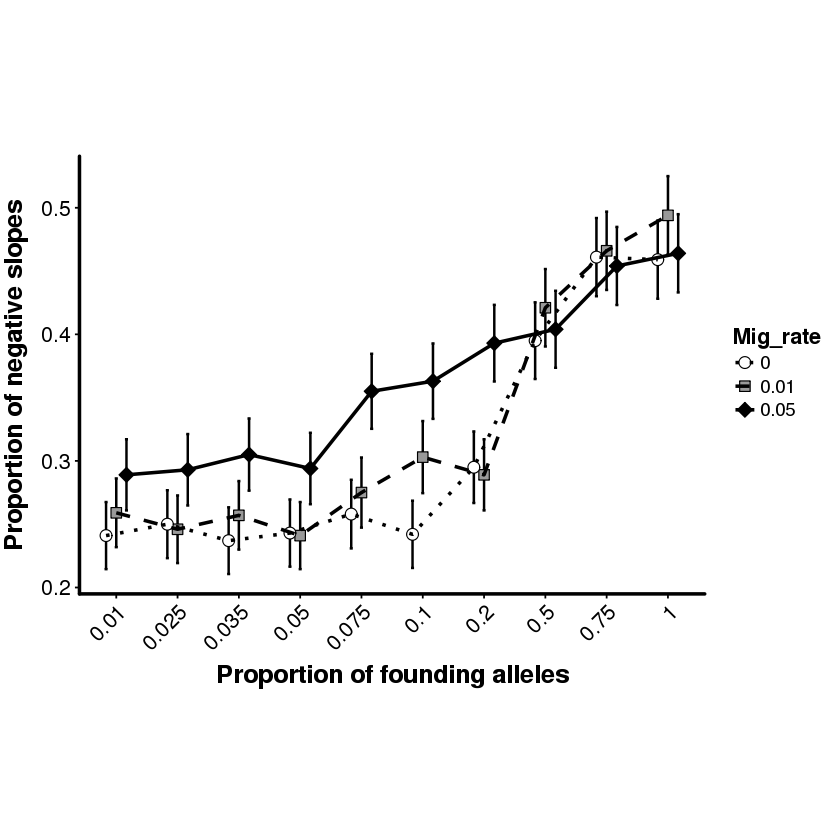

In [89]:
PropNeg_BotMig <- ggplot(datSlopes_GenOne, aes(x = bot, y = prop_neg, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = prop_neg - ci_neg, ymax = prop_neg + ci_neg), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of negative slopes") + xlab("Proportion of founding alleles") + ng1.45
PropNeg_BotMig + ng1.45

In [17]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_Melt_NoMig <- dplyr::select(datSlopes_GenOne_NoMig, bot, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(datSlopes_GenOne_NoMig[,c("bot", "prop_sigPos", "ci_sigPos")], 
            id=c("bot", "ci_sigPos"))
dm2 <- melt(datSlopes_GenOne_NoMig[,c("bot", "prop_sigNeg", "ci_sigNeg")], 
            id=c("bot", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = "ci_sigPos", new = "ci")
setnames(dm2, old = "ci_sigNeg", new = "ci")

#Merge melted dataframes
SlopeSum_Melt_NoMig <- rbind(dm1, dm2)
SlopeSum_Melt_NoMig

bot,ci,variable,value
0.01,0.03060106,prop_sigPos,0.421
0.025,0.03027239,prop_sigPos,0.607
0.035,0.02925427,prop_sigPos,0.665
0.05,0.02788964,prop_sigPos,0.718
0.075,0.02751689,prop_sigPos,0.730
0.1,0.02669373,prop_sigPos,0.754
0.2,0.02914409,prop_sigPos,0.670
0.5,0.03085889,prop_sigPos,0.454
0.75,0.02994114,prop_sigPos,0.371
1,0.02884005,prop_sigPos,0.317


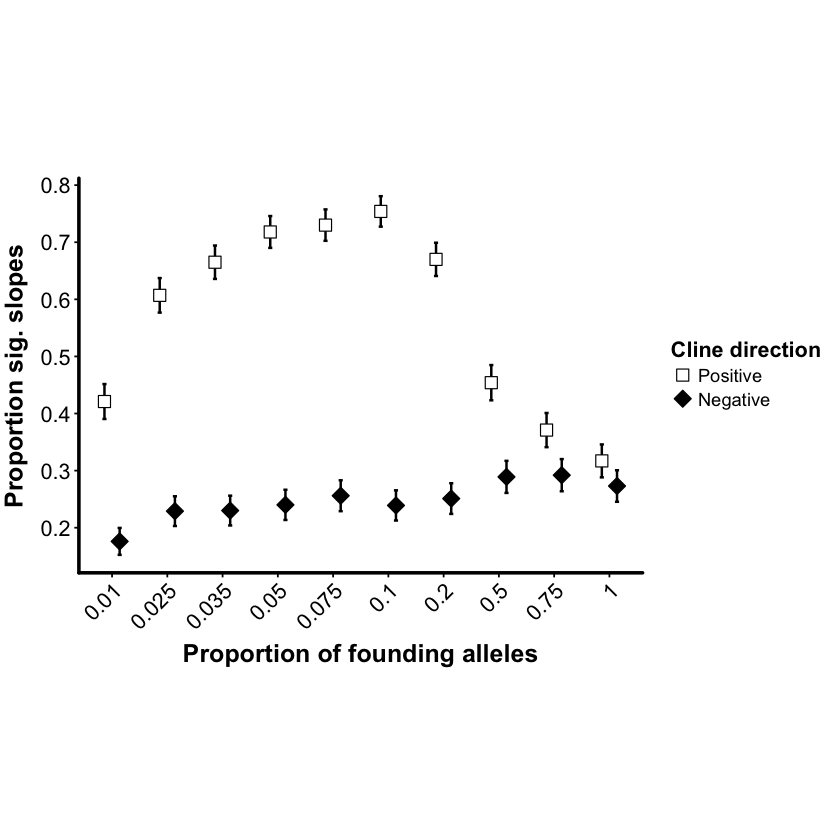

In [25]:
#Plot proportion of significant slopes by migration rate
PropSig_Bot_NoMig <- ggplot(SlopeSum_Melt_NoMig, aes(x = factor(bot), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.55)) +
    ylab("Proportion sig. slopes") + xlab("Proportion of founding alleles") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(22, 23))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_Bot_NoMig

In [30]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Figures"

MeanSlope_BotMig_NoLeg = MeanSlope_BotMig + theme(legend.position="none")
PropSigPos_BotMig_NoLeg = PropSigPos_BotMig + theme(legend.position="none")
PropSig_Bot_NoMig_NoLeg = PropSig_Bot_NoMig + theme(legend.position="none")
propLost_bot_NoMig_NoLeg = propLost_bot_NoMig + theme(legend.position="none")

ggsave("MeanSlope_BotMig_NoLeg.pdf", plot = MeanSlope_BotMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("PropSigPos_BotMig_NoLeg.pdf", plot = PropSigPos_BotMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("propLost_bot_NoMig_NoLeg.pdf", plot = propLost_bot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("FreqFirstGen_StrongBot_NoMig.pdf", plot = FreqFirstGen_StrongBot_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("FreqFirstGen_InterBot_NoMig.pdf", plot = FreqFirstGen_InterBot_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("FreqFirstGen_NoBot_NoMig.pdf", plot = FreqFirstGen_NoBot_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("PropSig_Bot_NoMig_NoLeg.pdf", plot = PropSig_Bot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
